**Linear Regression**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('headbrain.csv',encoding="ISO-8859-1")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


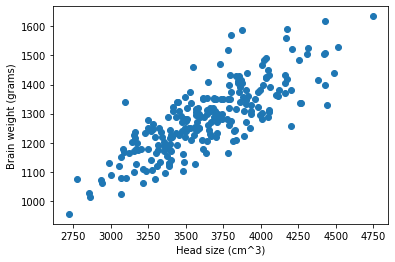

In [3]:
a = df['Head Size(cm^3)'].tolist()
b = df['Brain Weight(grams)'].tolist()
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');
plt.scatter(a, b)

In [4]:
mean_x = np.mean(a)
mean_y = np.mean(b)
print(mean_x)
print(mean_y)

3633.9915611814345
1282.873417721519


In [5]:
# calculating coefficient
n = len(a)
numer = 0
denom = 0
for i in range (n):
  numer += (a[i] - mean_x) * (b[i] - mean_y)
  denom += (a[i] - mean_x) ** 2
b2 = numer /denom
b0 = mean_y - (b2 * mean_x)
print ("coefficient: ",b2)
print ("Intercept: ",b0)

coefficient:  0.26342933948939945
Intercept:  325.57342104944223


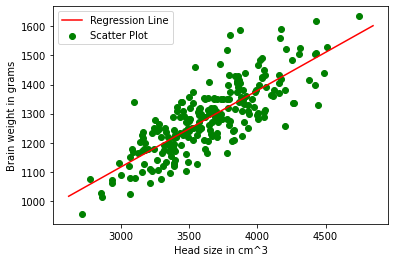

In [6]:
# flotting value and linear regression line
max_x = np.max(a) + 100
min_x = np.min(a) -100

x = np.linspace(max_x, min_x, 1000)
y = b0 + b2 * x

plt.plot(x, y, color= 'red', label = "Regression Line")
plt.scatter(a, b, color= 'green', label = "Scatter Plot")

plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [7]:
#calculating Root Mean Squares Error

rmse = 0
for i in range (n):
  y_pred = b0 + b2 * a[i]
  rmse += (b[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


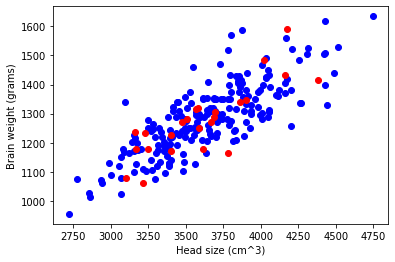

In [8]:
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split( a, b, test_size=.1, random_state=1)

plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

...........................................................................................................................

**Polynomial Regression**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

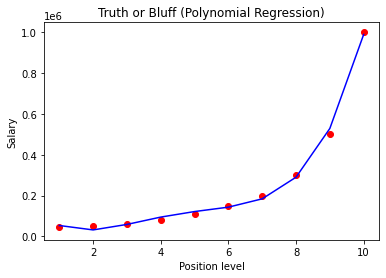

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [12]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))


array([132148.43750002])